This is the Homework for Session 1:

Follow the example from the previous notebook Linear Regression using SGD and build a loop that properly finds the centers of these 4 clusters using k-means.

**1. Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

**2. Setting initial variables & generating the raw material for our task**

(400, 2) (400,) (4, 2)


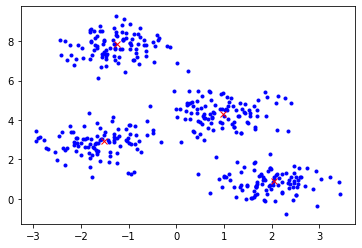

In [2]:
#Total number of data points
npoints = 400
#Total number of categories
N = 4
#Generating a number of 400 data points, with 4 centers, standard deviation 0.6 and the seed "0"
x, cluster_labels, cluster_centers = make_blobs(n_samples=npoints, centers=N,
                       cluster_std=0.60, random_state=0,
                       return_centers=True)

#Then lets have a check if the data points are successfully generated
print(x.shape, cluster_labels.shape, cluster_centers.shape)
plt.plot(x[:,0], x[:,1], 'b.')
plt.plot(cluster_centers[:,0], cluster_centers[:,1], 'rx')

**3. Here we define necessary components (functions) used in the k-mean method**

In [3]:
#At the very begining, randomly pick N points in the existing data points as the initial centers
#The outputed centroids is of dimention (N,2)
def initialize_centroids(x, N):
  x_indices = np.random.choice(np.arange(0,x.shape[0]), N)
  centroids = x[x_indices,:]
  return centroids

#Analyze the distance between each data points (x) and the set of known centroids (c), and then assign labels to that data point
def assign_labels(x,c):
  #Centroids (c) data are of the dimension (N,2), but data points are of the dimension (npoints,2)
  #to conduct the (x - c) operation, we need to artifically insert a dimension to c
  c = c[:,np.newaxis,:]
  #dist2 is of the dimension (N,npoints,2)
  dist2 = (x - c)**2
  #Sum over the third dimension of dist2 to creat cartesian distance. The resulted dist2 is of the dimension (N,npoints)
  #representing the distances between N centroids and npoints data points
  dist2 = dist2.sum(axis=2)
  #For every data point, find out its nearest centroid and return indices. The new variable "label" is of the dimension (npoints)
  label = np.argmin(dist2,axis=0)
  return label


def get_new_centroids(x, labels, N):
  """returns the new centroids assigned from the points closest to them"""
  return np.array([x[labels==k].mean(axis=0) for k in range(N)])

**4. Here goes the iterative k-mean optimization**

point labels unchanged as of iteration 7
0.13986907315096497
200
accuracy:  0.5


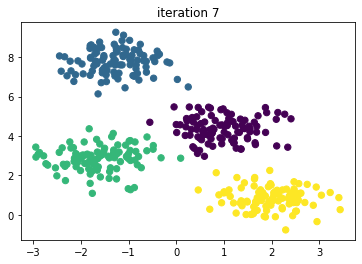

In [19]:
delta = 0.005

last_centroids = initialize_centroids(x, N)
last_labels = assign_labels(x, last_centroids)

iter_max = 1000
n_iter = 1
while n_iter in range(1, iter_max):
  centroids = get_new_centroids(x, last_labels, N)
  labels = assign_labels(x, centroids)

  center_move = np.sum( (centroids - last_centroids)**2 )
  if np.all((last_centroids - centroids) < delta):
    print('centroids unchanged as of iteration %d' % n_iter)
    break
  elif np.all(labels==last_labels):
    print('point labels unchanged as of iteration %d' % n_iter)
    break
  else:
    last_centroids = centroids
    last_labels = labels
    n_iter = n_iter + 1

print( np.sum(centroids - cluster_centers)**2 )
print(np.sum((cluster_labels == labels).astype(int)))
accuracy = np.sum((cluster_labels == labels).astype(int)) / cluster_labels.shape[0]
print('accuracy: ',accuracy)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis')
plt.title('iteration %d' % n_iter)
plt.show()

